In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tf_keras_vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 903.0 kB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_keras_vis.utils.scores import BinaryScore
from tf_keras_vis.scorecam import Scorecam as ScoreCAM

In [ ]:
sample_MSAs=['Q9NRX1', 'Q9NYG5', 'Q9NX00', 'Q9NVG8', 'Q9NV79', 'Q9BWU0', 'Q8WTV1', 'Q96T54', 'Q9GZW5', 'Q92917', 'Q8TD06', 'Q9BQD3']
classes= ['ERRORS', 'NO_ERRORS']

In [ ]:
def read_and_preprocess_img(path, target_size):
    img = load_img(path, target_size=target_size)
    x = img_to_array(img)
    x = x/255.
    x = np.expand_dims(x, axis=0)
    return x

# Nouvelle section

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 1024, 3)]    0         
                                                                 
 conv2d (Conv2D)             (None, 224, 1024, 16)     1696      
                                                                 
 activation (Activation)     (None, 224, 1024, 16)     0         
                                                                 
 batch_normalization (Batch  (None, 224, 1024, 16)     64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 1024, 16)     1552      
                                                                 
 activation_1 (Activation)   (None, 224, 1024, 16)     0         
                                                             

<ipython-input-14-72b897f9ca12>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = BinaryScore([int((pred > 0.5).astype("int32"))])


16/16 [==============================] - 3s 147ms/step


<ipython-input-14-72b897f9ca12>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[0].set_title('MSA with prediction: {}'.format(classes[int((pred > 0.5).astype("int32"))]))


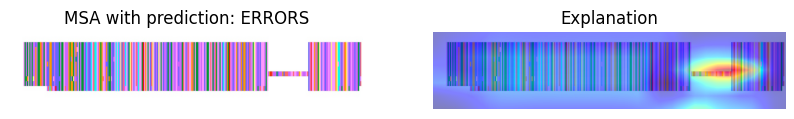

16/16 [==============================] - 2s 147ms/step


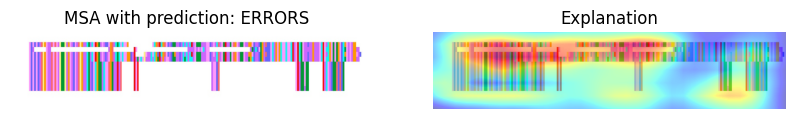

16/16 [==============================] - 3s 194ms/step


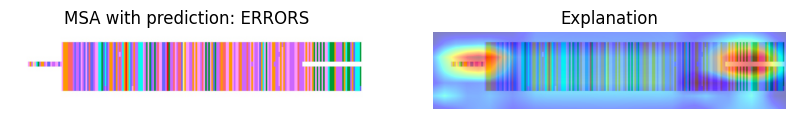

16/16 [==============================] - 3s 160ms/step


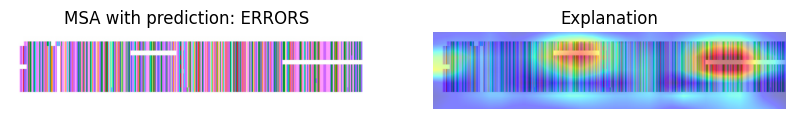

16/16 [==============================] - 3s 159ms/step


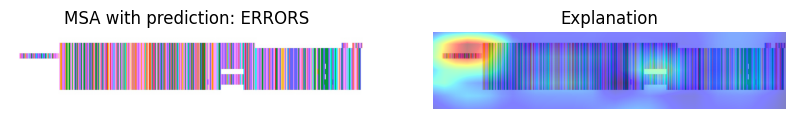

16/16 [==============================] - 2s 146ms/step


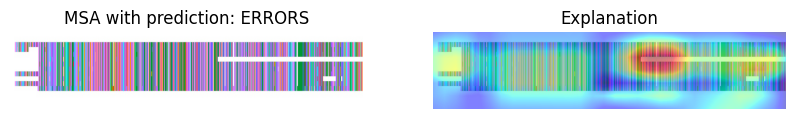

16/16 [==============================] - 2s 147ms/step


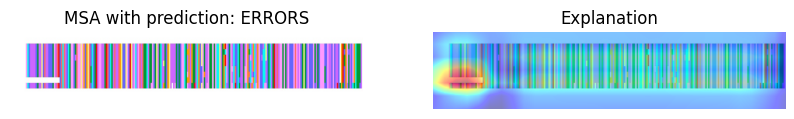

16/16 [==============================] - 2s 147ms/step


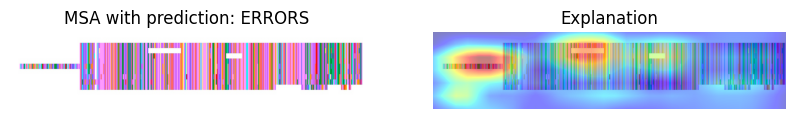

16/16 [==============================] - 2s 147ms/step


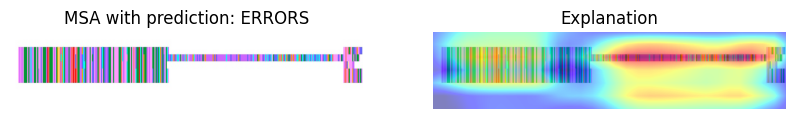

16/16 [==============================] - 2s 147ms/step


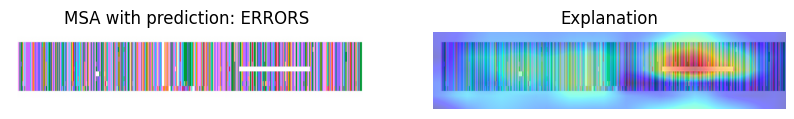

16/16 [==============================] - 2s 147ms/step


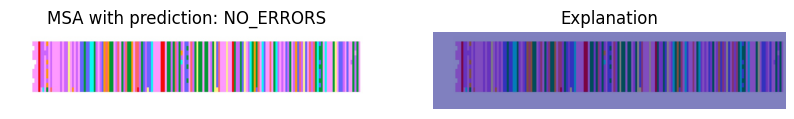

16/16 [==============================] - 2s 147ms/step


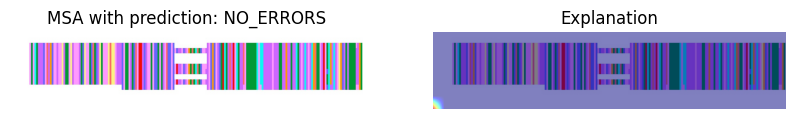

In [ ]:
hybrid = load_model('gdrive/MyDrive/CAMs/models/demisted_hybrid.h5')
hybrid.summary()
for msa in sample_MSAs:
    msa_x = read_and_preprocess_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224,1024))
    pred = hybrid.predict(msa_x)
    score = BinaryScore([int((pred > 0.5).astype("int32"))])
    # Create ScoreCAM object
    scorecam = ScoreCAM(hybrid)
    # Generate heatmap with ScoreCAM
    msa_cam = scorecam(score, msa_x, penultimate_layer=-1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot MSA
    axes[0].imshow(load_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224, 1024)))
    axes[0].set_title('MSA with prediction: {}'.format(classes[int((pred > 0.5).astype("int32"))]))

    # Plot Explanation with Score-CAM
    axes[1].imshow(load_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224, 1024)))
    plt.imshow(msa_cam[0], cmap='jet', alpha=0.5)
    axes[1].set_title('Explanation')

    # Remove ticks
    axes[0].axis('off')
    axes[1].axis('off')

    plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 1024, 3)]    0         
                                                                 
 conv2d (Conv2D)             (None, 224, 1024, 16)     1216      
                                                                 
 activation (Activation)     (None, 224, 1024, 16)     0         
                                                                 
 batch_normalization (Batch  (None, 224, 1024, 16)     64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 512, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 512, 16)      0     

<ipython-input-15-a3e78907d709>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = BinaryScore([int((pred > 0.5).astype("int32"))])


16/16 [==============================] - 5s 98ms/step


<ipython-input-15-a3e78907d709>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[0].set_title('MSA with prediction: {}'.format(classes[int((pred > 0.5).astype("int32"))]))


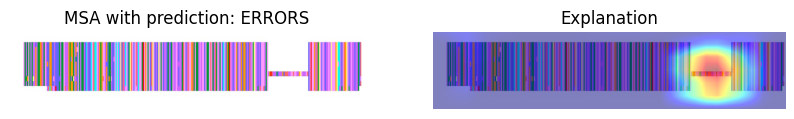

16/16 [==============================] - 1s 81ms/step


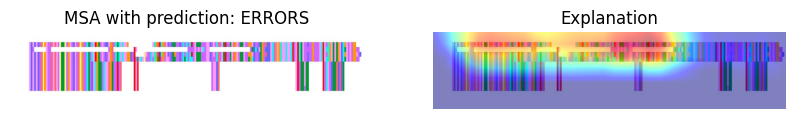

16/16 [==============================] - 1s 82ms/step


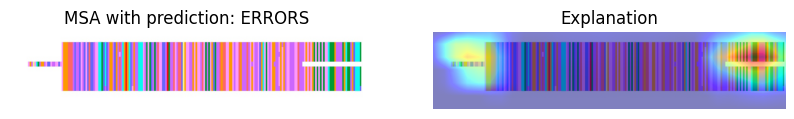

16/16 [==============================] - 1s 81ms/step


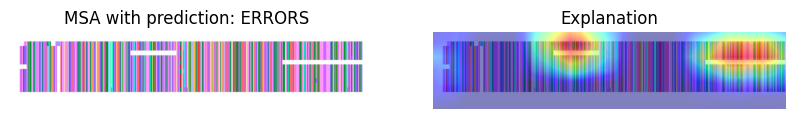

16/16 [==============================] - 1s 82ms/step


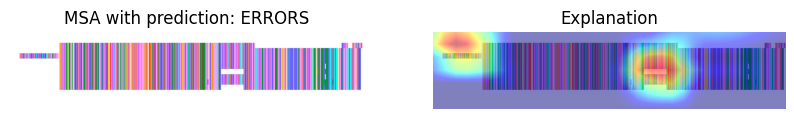

16/16 [==============================] - 1s 82ms/step


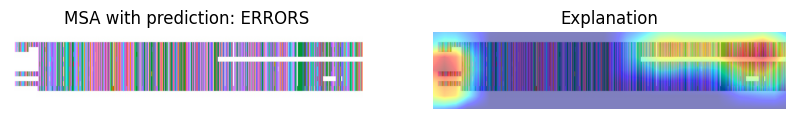

16/16 [==============================] - 1s 82ms/step


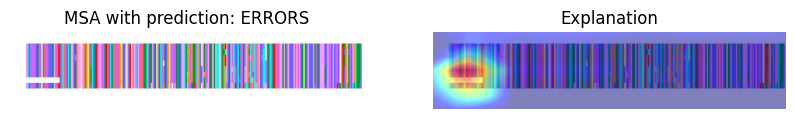

16/16 [==============================] - 1s 82ms/step


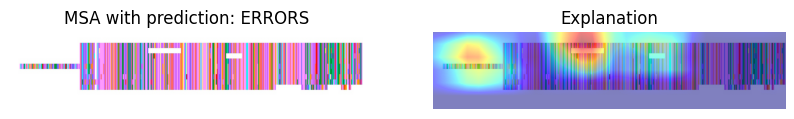

16/16 [==============================] - 1s 83ms/step


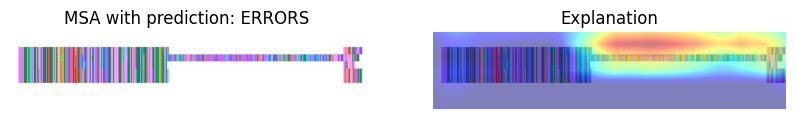

16/16 [==============================] - 1s 81ms/step


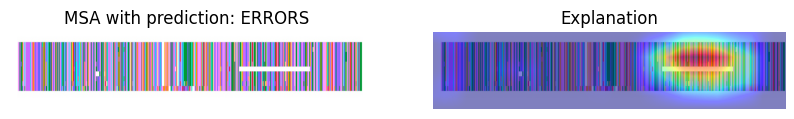

16/16 [==============================] - 1s 83ms/step


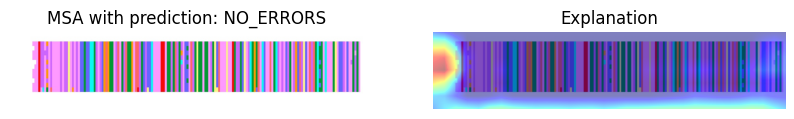

16/16 [==============================] - 1s 83ms/step


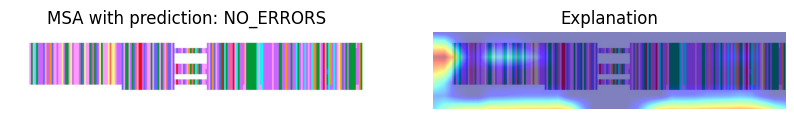

In [ ]:
square = load_model('gdrive/MyDrive/CAMs/models/demisted_square.h5')
square.summary()
for msa in sample_MSAs:
    msa_x = read_and_preprocess_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224,1024))
    pred = square.predict(msa_x)
    score = BinaryScore([int((pred > 0.5).astype("int32"))])
    # Create ScoreCAM object
    scorecam = ScoreCAM(square)
    # Generate heatmap with ScoreCAM
    msa_cam = scorecam(score, msa_x, penultimate_layer=-1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot MSA
    axes[0].imshow(load_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224, 1024)))
    axes[0].set_title('MSA with prediction: {}'.format(classes[int((pred > 0.5).astype("int32"))]))

    # Plot Explanation with Score-CAM
    axes[1].imshow(load_img('/content/gdrive/MyDrive/CAMs/images/sample_MSAs/'+str(msa)+'.jpg', target_size=(224, 1024)))
    plt.imshow(msa_cam[0], cmap='jet', alpha=0.5)
    axes[1].set_title('Explanation')

    # Remove ticks
    axes[0].axis('off')
    axes[1].axis('off')

    plt.show()